<a href="https://colab.research.google.com/github/luizrenault/tp547/blob/main/trabalho_final_parte_1/nshmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

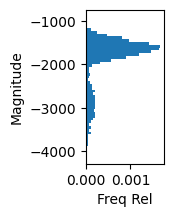

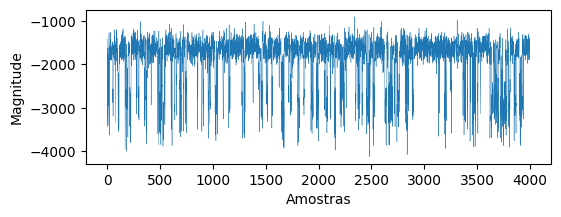

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def transicao(distribuicao):
    acumulada = np.cumsum(distribuicao)
    r = np.random.uniform(0, 1)
    return np.argmax(acumulada > r)

def potencia(estado, mu, sigma2):
    return np.random.normal(mu[estado], sigma2[estado])


n = 4000

pi=[0.5, 0.5]
mu=[-2923.09, -1618.61]
sigma2=[189177, 33657.6]
sigma2=np.sqrt(sigma2)

D=10
G=np.array([
    [[0.99483, 0.00517047],
    [0.0241291, 0.975871]],

    [[0.930794, 0.0692055],
    [0.0498295, 0.950171]],

    [[0.983145, 0.0168547],
    [0.147365, 0.852635]],

    [[0.827991, 0.172009],
    [0.165497, 0.834503]],

    [[0.828104, 0.171896],
    [0.119308, 0.880692]],

    [[0.84452, 0.15548],
    [0.0376518, 0.962348]],

    [[0.761267, 0.238733],
    [0.079638, 0.920362]],

    [[0.887021, 0.112979],
    [0.0300685, 0.969932]],

    [[0.900212, 0.0997884],
    [0.0100000, 0.9900000]],

    [[0.77699, 0.22301],
    [0.0322467, 0.967753]],

    ])

#inicialização dos vetores de estados e potências
estados = np.zeros(n, int)
potencias = np.zeros(n)
permanencias = np.array([])

#geração do estado e potência iniciais
estados[0] = transicao(pi)
potencias[0] = potencia(estados[0], mu, sigma2)
permanencia=1

#geração da sequência de estados e potências
for j in np.arange(1, n, 1):
    estados[j]=transicao(G[np.min([permanencia,D-1]), estados[j-1]])
    potencias[j]=potencia(estados[j], mu, sigma2)

    if estados[j]==estados[j-1]:
        permanencia=permanencia+1
    else:
        permanencias = np.append(permanencias, permanencia)
        permanencia=1

t=np.arange(0, n)

plt.figure(figsize=(1,2))
plt.hist(potencias, bins=50,density=True, orientation='horizontal')
plt.ylabel('Magnitude')
plt.xlabel('Freq Rel')
plt.show()

plt.figure(figsize=(6,2))
plt.plot(t,potencias, linewidth=0.3)
plt.xlabel('Amostras')
plt.ylabel('Magnitude')
plt.show()

